In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv('Data/CustomerProfiles_Q2.csv')
x1 = data.iloc[:, 0].values
x2 = data.iloc[:, 1].values

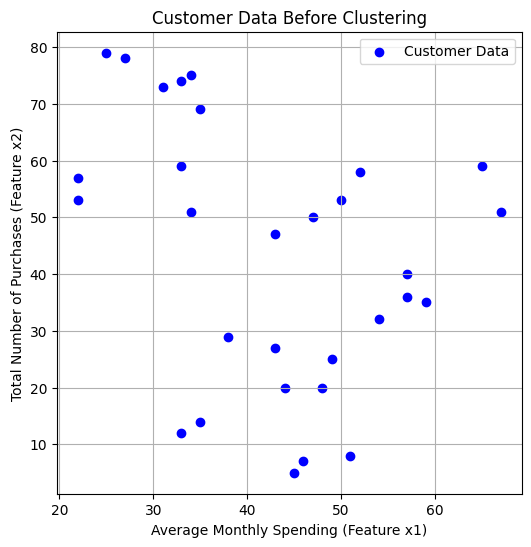

In [2]:
# A) Plotting the initial data points
plt.figure(figsize=(6, 6))
plt.scatter(x1, x2, color='blue', label='Customer Data')
plt.xlabel('Average Monthly Spending (Feature x1)')
plt.ylabel('Total Number of Purchases (Feature x2)')
plt.title('Customer Data Before Clustering')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# B) Implementing K-means function
def k_means(data, k, max_iter=100):
    np.random.seed(42)
    n_samples = data.shape[0]
    # Initial centroids
    centroids = data[:k].copy()
    cluster_assignments = np.zeros(n_samples)
    for _ in range(max_iter):
        # Assign clusters based on nearest centroid
        for i in range(n_samples):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            cluster_assignments[i] = np.argmin(distances)
        # Update centroids
        new_centroids = np.array([data[cluster_assignments == j].mean(axis=0) for j in range(k)])
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return cluster_assignments, centroids

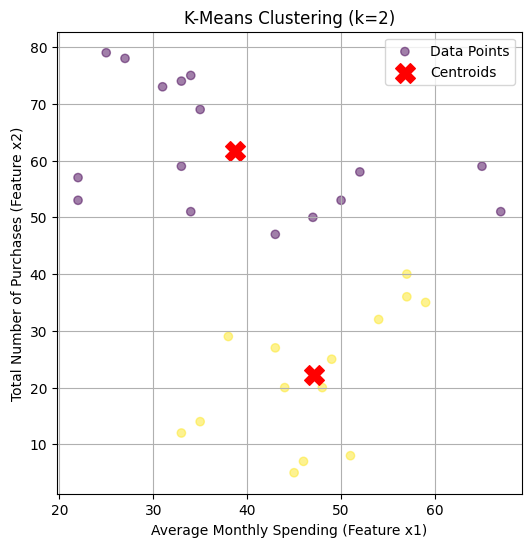

In [4]:
# C) Plot the final clusters when k = 2
data_points = data[['f1', 'f2']].values
k = 2
cluster_assignments, centroids = k_means(data_points, k)

plt.figure(figsize=(6, 6))
plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_assignments, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Average Monthly Spending (Feature x1)')
plt.ylabel('Total Number of Purchases (Feature x2)')
plt.title(f'K-Means Clustering (k={k})')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# D) Report how many data points are in each cluster after finishing the clustering
cluster_counts = np.bincount(cluster_assignments.astype(int))
print("Number of data points in each cluster:")
for i in range(k):
    print(f"Cluster {i}: {cluster_counts[i]}")

Number of data points in each cluster:
Cluster 0: 16
Cluster 1: 14


In [6]:
# E) Reporting Final Centroids
print("\nFinal Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: ({centroid[0]:.1f}, {centroid[1]:.1f})")


Final Centroids:
Cluster 0: (38.8, 61.6)
Cluster 1: (47.1, 22.1)
